## Checking consistency of OBJ loader

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lmenv
env = lmenv.load('.lmenv')

In [3]:
import os
import imageio
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import lmscene
import lightmetrica as lm

In [4]:
%load_ext lightmetrica_jupyter

In [5]:
lm.init()
lm.log.init('jupyter')
lm.progress.init('jupyter')
lm.info()

[I|0.000] Lightmetrica -- Version 3.0.0 (rev. 70601db) Linux x64


In [6]:
lm.comp.load_plugin(os.path.join(env.bin_path, 'accel_embree'))
lm.comp.load_plugin(os.path.join(env.bin_path, 'objloader_tinyobjloader'))

[I|0.016] Loading plugin [name='accel_embree']
[I|0.017] .. Successfully loaded [name='accel_embree']
[I|0.018] Loading plugin [name='objloader_tinyobjloader']
[I|0.018] .. Successfully loaded [name='objloader_tinyobjloader']


In [7]:
def build_and_render(scene_name):
    lm.reset()
    accel = lm.load_accel('accel', 'embree')
    scene = lm.load_scene('scene', 'default', accel=accel)
    lmscene.load(scene, env.scene_path, scene_name)
    scene.build()
    film = lm.load_film('film_output', 'bitmap', w=1920, h=1080)
    renderer = lm.load_renderer('renderer', 'raycast', scene=scene, output=film)
    renderer.render()
    return np.copy(film.buffer())

In [8]:
objloaders = ['tinyobjloader']
scene_names = lmscene.scenes_small()

In [9]:
def rmse_pixelwised(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2, axis=2) / 3)

[I|0.086] Loading asset [name='accel']
[I|0.087] .. {"intcost":1.0,"maxBranchingFactor":2,"maxDepth":18,"maxLeafSize":32,"minLeafSize":1,"quality":1,"sahBlockSize":1,"travcost":1.0}
[I|0.087] .. {"compact":false,"dynamic":false,"filter":false,"robust":false}
[I|0.087] Loading asset [name='scene']
[I|0.087] Loading asset [name='camera_main']
[I|0.087] Loading asset [name='model_obj']
[I|0.087] .. Loading OBJ file [path='fireplace_room.obj']
[I|0.087] .. Loading MTL file [path='fireplace_room.mtl']


[I|0.414] .. Loading texture [path='wood.ppm']
[I|0.504] .. Loading texture [path='leaf.ppm']
[I|0.506] .. Loading texture [path='picture8.ppm']
[I|0.537] .. Loading texture [path='wood5.ppm']
[I|0.592] Building acceleration structure [name='accel']
[I|0.592] .. Flattening scene
[I|0.597] .. Building
[I|0.645] Loading asset [name='film_output']
[I|0.722] Loading asset [name='renderer']


  0%|          | 0/2073600 [00:00<?, ?it/s]

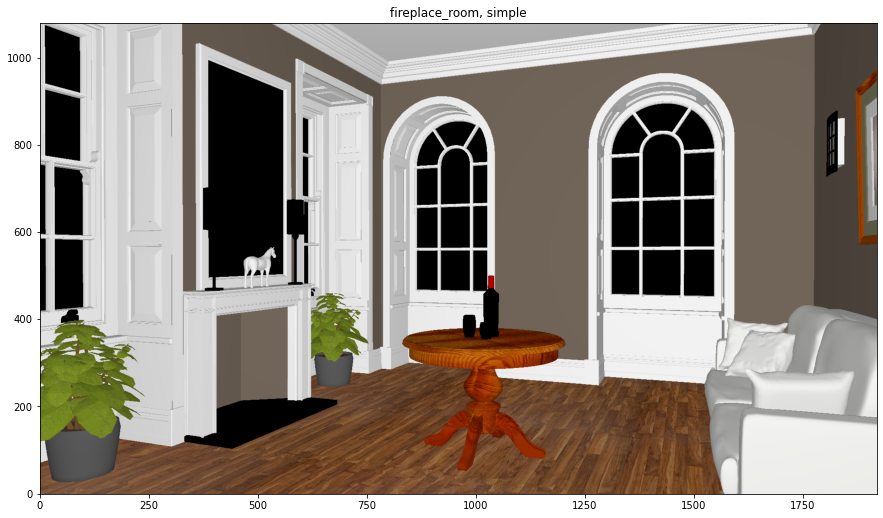

[I|3.423] Loading asset [name='accel']
[I|3.424] .. {"intcost":1.0,"maxBranchingFactor":2,"maxDepth":18,"maxLeafSize":32,"minLeafSize":1,"quality":1,"sahBlockSize":1,"travcost":1.0}
[I|3.424] .. {"compact":false,"dynamic":false,"filter":false,"robust":false}
[I|3.424] Loading asset [name='scene']
[I|3.424] Loading asset [name='camera_main']
[I|3.424] Loading asset [name='model_obj']
[I|3.710] .. Loading texture [path='wood.ppm']
[I|3.792] .. Loading texture [path='leaf.ppm']
[I|3.794] .. Loading texture [path='picture8.ppm']
[I|3.821] .. Loading texture [path='wood5.ppm']
[I|3.874] Building acceleration structure [name='accel']
[I|3.874] .. Flattening scene
[I|3.879] .. Building
[I|3.923] Loading asset [name='film_output']
[I|4.000] Loading asset [name='renderer']


  0%|          | 0/2073600 [00:00<?, ?it/s]

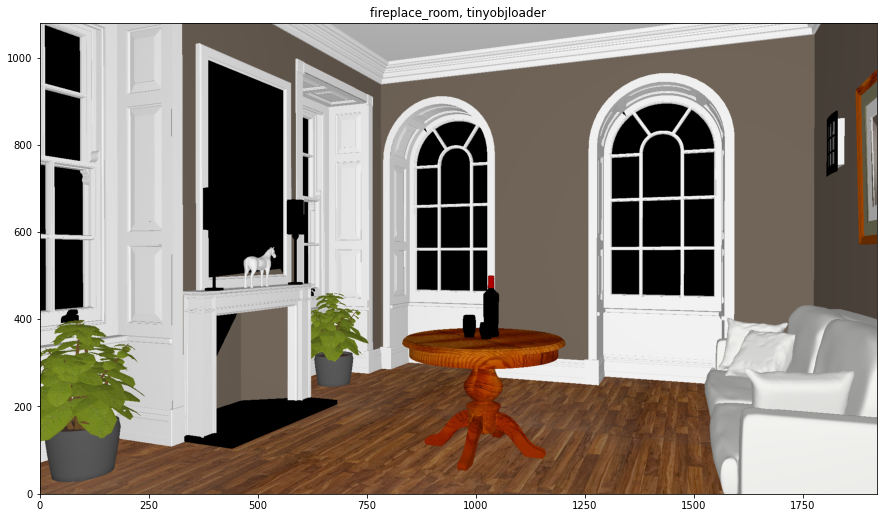

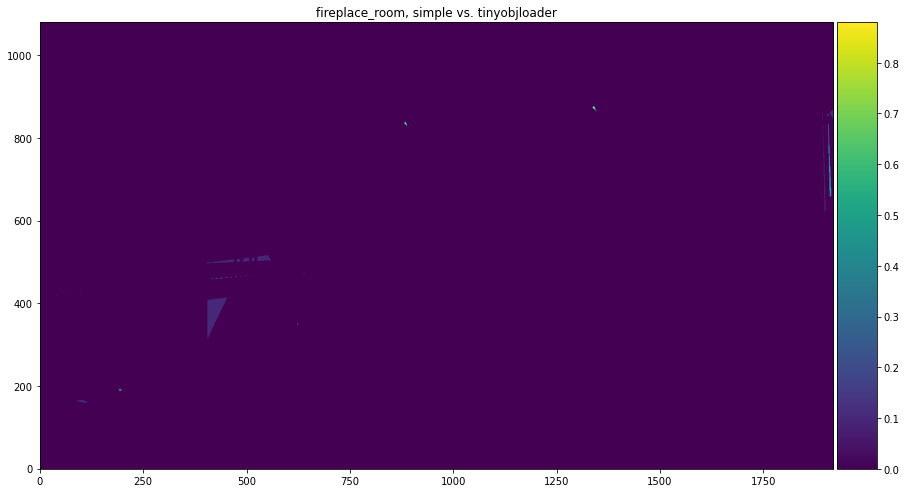

[I|7.137] Loading asset [name='accel']
[I|7.154] .. {"intcost":1.0,"maxBranchingFactor":2,"maxDepth":18,"maxLeafSize":32,"minLeafSize":1,"quality":1,"sahBlockSize":1,"travcost":1.0}
[I|7.154] .. {"compact":false,"dynamic":false,"filter":false,"robust":false}
[I|7.154] Loading asset [name='scene']
[I|7.155] Loading asset [name='camera_main']
[I|7.155] Loading asset [name='model_obj']
[I|7.155] .. Loading OBJ file [path='CornellBox-Sphere.obj']
[I|7.155] .. Loading MTL file [path='CornellBox-Sphere.mtl']
[I|7.157] Building acceleration structure [name='accel']
[I|7.157] .. Flattening scene
[I|7.158] .. Building
[I|7.158] Loading asset [name='film_output']
[I|7.236] Loading asset [name='renderer']


  0%|          | 0/2073600 [00:00<?, ?it/s]

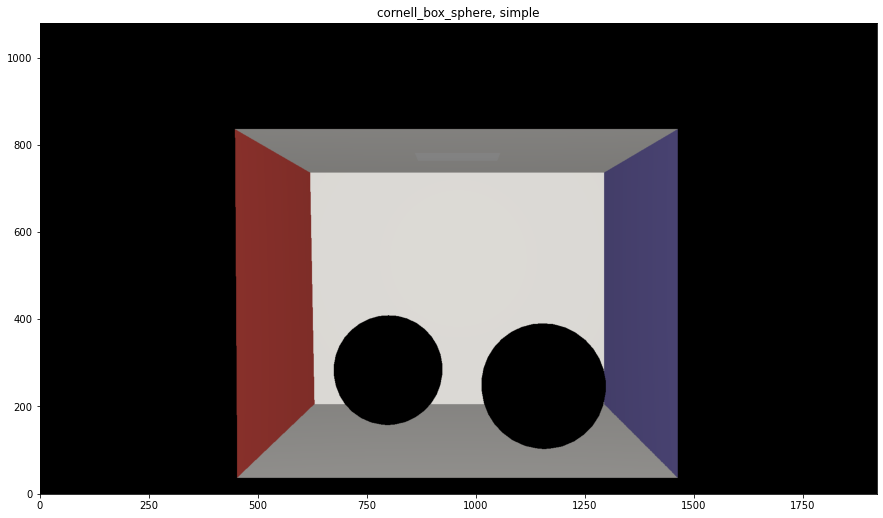

[I|9.094] Loading asset [name='accel']
[I|9.095] .. {"intcost":1.0,"maxBranchingFactor":2,"maxDepth":18,"maxLeafSize":32,"minLeafSize":1,"quality":1,"sahBlockSize":1,"travcost":1.0}
[I|9.095] .. {"compact":false,"dynamic":false,"filter":false,"robust":false}
[I|9.095] Loading asset [name='scene']
[I|9.095] Loading asset [name='camera_main']
[I|9.095] Loading asset [name='model_obj']
[I|9.098] Building acceleration structure [name='accel']
[I|9.098] .. Flattening scene
[I|9.098] .. Building
[I|9.099] Loading asset [name='film_output']
[I|9.176] Loading asset [name='renderer']


[W|9.097] .. Both `d` and `Tr` parameters defined for "light". Use the value of `d` for dissolve (line 76 in .mtl.)



  0%|          | 0/2073600 [00:00<?, ?it/s]

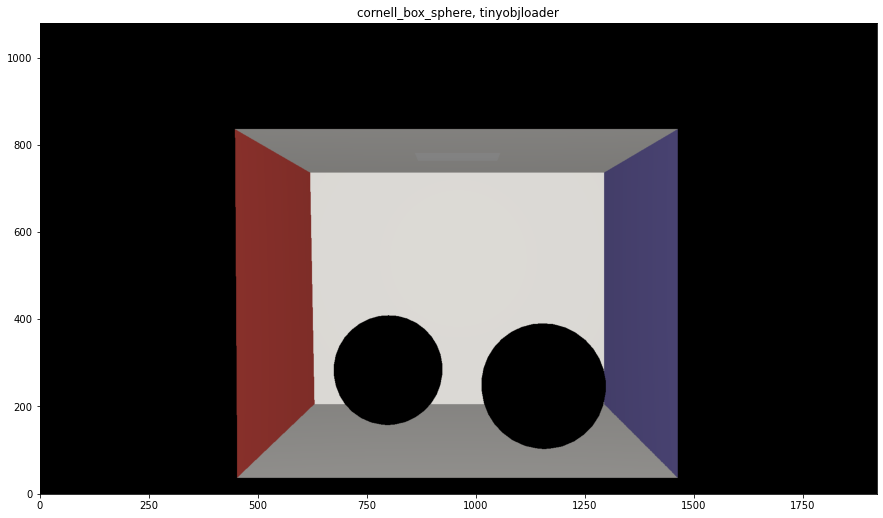

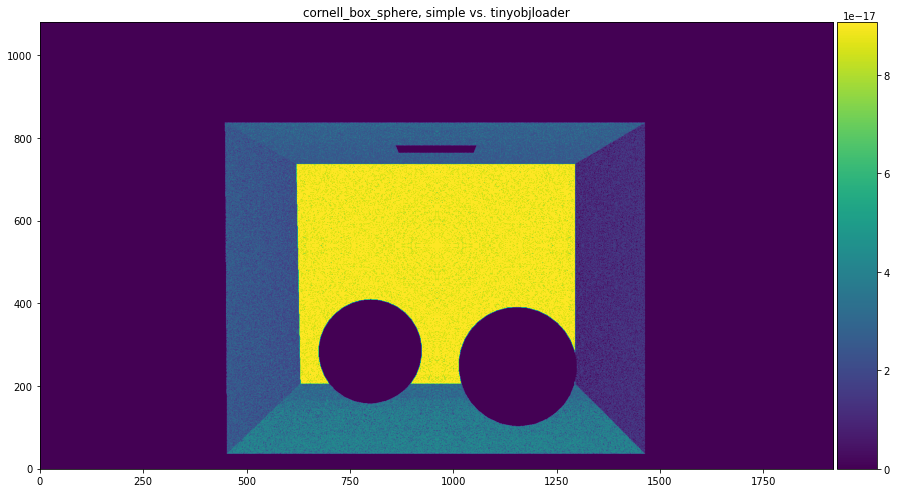

[I|11.617] Loading asset [name='accel']
[I|11.617] .. {"intcost":1.0,"maxBranchingFactor":2,"maxDepth":18,"maxLeafSize":32,"minLeafSize":1,"quality":1,"sahBlockSize":1,"travcost":1.0}
[I|11.617] .. {"compact":false,"dynamic":false,"filter":false,"robust":false}
[I|11.617] Loading asset [name='scene']
[I|11.617] Loading asset [name='camera_main']
[I|11.617] Loading asset [name='model_obj']
[I|11.618] .. Loading OBJ file [path='cube.obj']
[I|11.618] .. Loading MTL file [path='default.mtl']
[I|11.618] .. Loading texture [path='default.png']
[I|11.628] Building acceleration structure [name='accel']
[I|11.628] .. Flattening scene
[I|11.629] .. Building
[I|11.629] Loading asset [name='film_output']
[I|11.705] Loading asset [name='renderer']


  0%|          | 0/2073600 [00:00<?, ?it/s]

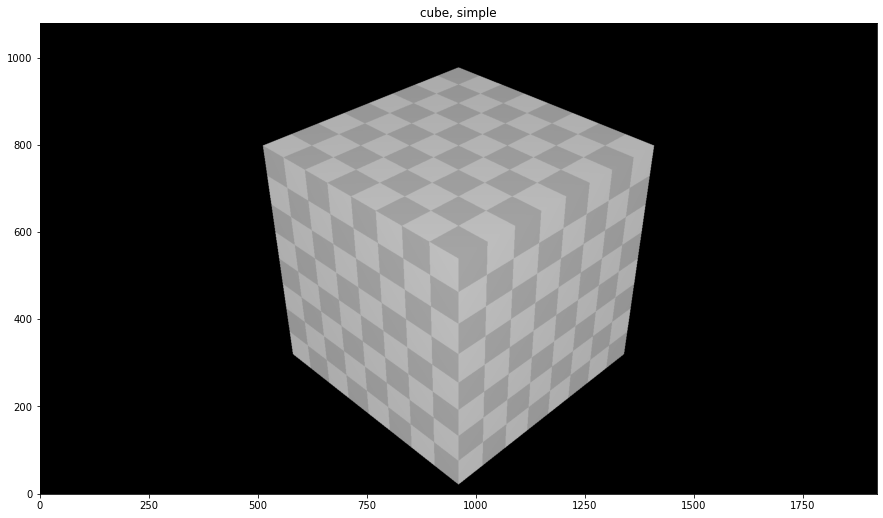

[I|13.567] Loading asset [name='accel']
[I|13.567] .. {"intcost":1.0,"maxBranchingFactor":2,"maxDepth":18,"maxLeafSize":32,"minLeafSize":1,"quality":1,"sahBlockSize":1,"travcost":1.0}
[I|13.567] .. {"compact":false,"dynamic":false,"filter":false,"robust":false}
[I|13.567] Loading asset [name='scene']
[I|13.567] Loading asset [name='camera_main']
[I|13.568] Loading asset [name='model_obj']
[I|13.568] .. Loading texture [path='default.png']
[I|13.579] Building acceleration structure [name='accel']
[I|13.579] .. Flattening scene
[I|13.579] .. Building
[I|13.579] Loading asset [name='film_output']
[I|13.655] Loading asset [name='renderer']


  0%|          | 0/2073600 [00:00<?, ?it/s]

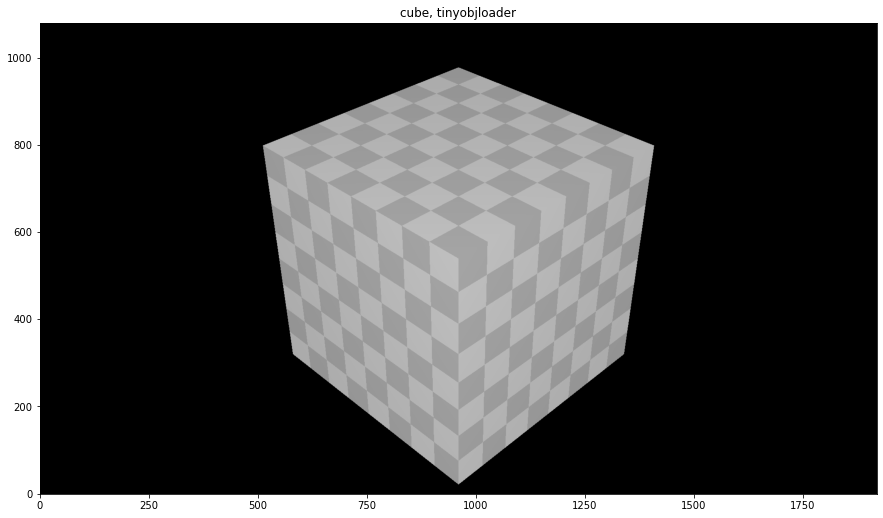

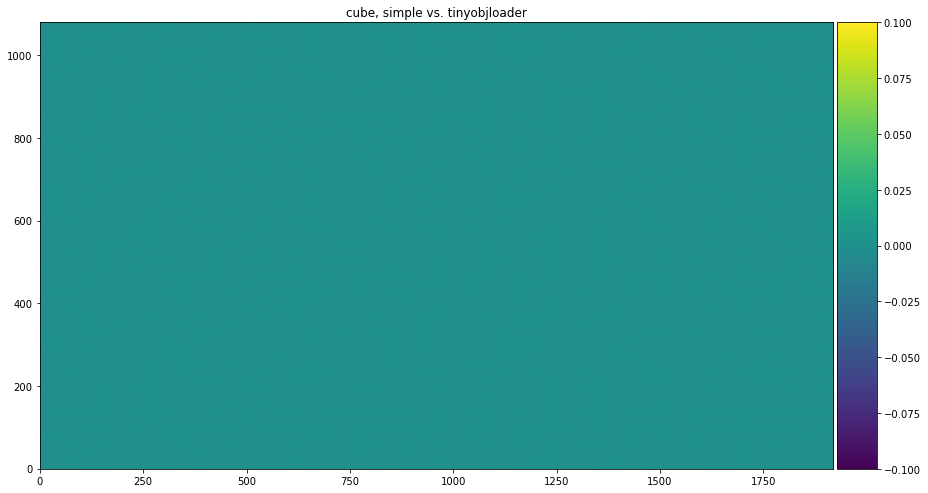

In [10]:
for scene_name in scene_names:
    # Reference
    lm.objloader.init('simple')
    ref = build_and_render(scene_name)
    
    # Visualize reference
    f = plt.figure(figsize=(15,15))
    ax = f.add_subplot(111)
    ax.imshow(np.clip(np.power(ref,1/2.2),0,1), origin='lower')
    ax.set_title('{}, simple'.format(scene_name))
    plt.show()
    
    # Check consistency with other loaders
    for objloader in objloaders:
        # Render
        lm.objloader.init(objloader, {})
        img = build_and_render(scene_name)
        diff = rmse_pixelwised(ref, img)
    
        # Visualize
        f = plt.figure(figsize=(15,15))
        ax = f.add_subplot(111)
        ax.imshow(np.clip(np.power(img,1/2.2),0,1), origin='lower')
        ax.set_title('{}, {}'.format(scene_name, objloader))
        plt.show()
    
        # Visualize the difference image
        f = plt.figure(figsize=(15,15))
        ax = f.add_subplot(111)
        im = ax.imshow(diff, origin='lower')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        ax.set_title('{}, simple vs. {}'.format(scene_name, objloader))
        plt.show()